In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


Не так много пропущеных значений, можно удалить.

In [4]:
df.dropna(inplace=True)

Немного распределений.))

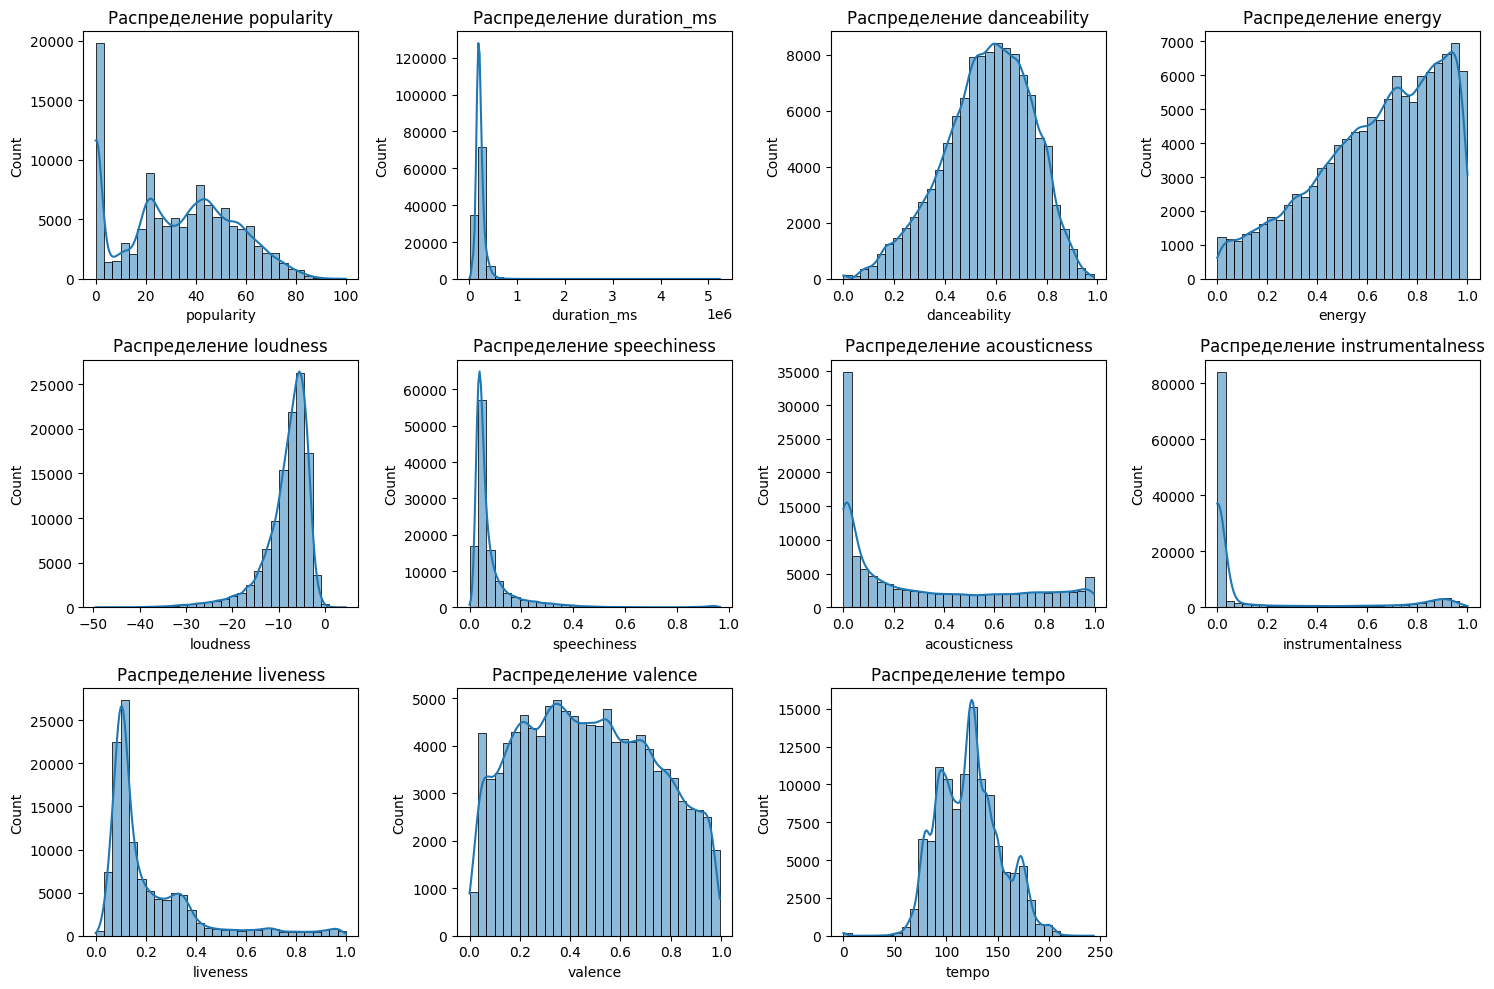

In [5]:
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy',
                     'loudness', 'speechiness', 'acousticness',
                     'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Распределение popularity:

Большая часть значений популярности сконцентрирована в нижнем диапазоне (0-20), что говорит о том, что большинство треков в датасете имеют низкую популярность. Однако присутствуют и более популярные треки, вплоть до 100.
Вывод: Распределение перекошено в сторону низких значений, что может повлиять на анализ. Этот перекос может быть вызван тем, что многие треки менее известны.

Распределение duration_ms:

Продолжительность треков имеет очень широкий диапазон, и основная часть данных сосредоточена на низких значениях. На гистограмме видно, что большинство треков имеют короткую продолжительность, но встречаются и исключения.
Вывод: Возможно, в датасете присутствуют треки с аномально большой длительностью, которые могут быть выбросами.

Распределение danceability:

Распределение танцевальности близко к нормальному, со средним значением около 0.5–0.6. Это значит, что многие треки имеют умеренную танцевальность.
Вывод: Такой признак распределен более равномерно и может хорошо подходить для анализа и предсказания.

Распределение energy:

Распределение энергии растет от 0 до 1, и большинство треков имеет высокие значения (0.7–1). Это указывает на преобладание энергичных треков.
Вывод: Поскольку значения энергии распределены ближе к максимуму, это может быть полезно для сегментации треков по энергичности.

Распределение loudness:

Громкость распределена с пиком около -10 дБ и варьируется от -50 до 0. Распределение имеет левосторонний перекос.
Вывод: Высокие значения громкости преобладают, что ожидаемо для аудиотреков.

Распределение speechiness:

Большинство значений находятся в диапазоне от 0 до 0.2, что указывает на низкий уровень речевых компонентов в треках.
Вывод: В датасете преобладают треки с низким содержанием речи, вероятно, это музыкальные композиции с минимальным вокалом.

Распределение acousticness:

Большинство значений близко к 0, что говорит о преобладании электронных или инструментальных треков с низкой акустичностью.
Вывод: Можно выделить акустичные треки как отдельную группу, так как их мало, и они отличаются от остальных.

Распределение instrumentalness:

Большая часть значений также близка к 0, что указывает на низкий уровень инструментальности у большинства треков (они содержат вокал).
Вывод: Треки с высоким уровнем инструментальности встречаются редко, что подтверждает вокальную направленность большинства треков.

Распределение liveness:

Большинство значений близко к 0, что говорит о том, что многие треки были записаны в студии, а не вживую.
Вывод: Преобладание студийных записей в данных может указывать на более профессиональную музыку.

Распределение valence:

Значения распределены равномерно по всему диапазону, что указывает на широкий разброс эмоциональной окраски треков.
Вывод: Признак может быть полезен для анализа настроения треков, поскольку он не имеет выраженного перекоса.

Распределение tempo:

Темп имеет несколько пиков, что говорит о наличии популярных темпов среди треков, таких как 120 и 150 ударов в минуту.
Вывод: Это распределение может помочь выделить подкатегории треков с популярными темпами для жанрового анализа.

Теперь немного корреляции.))

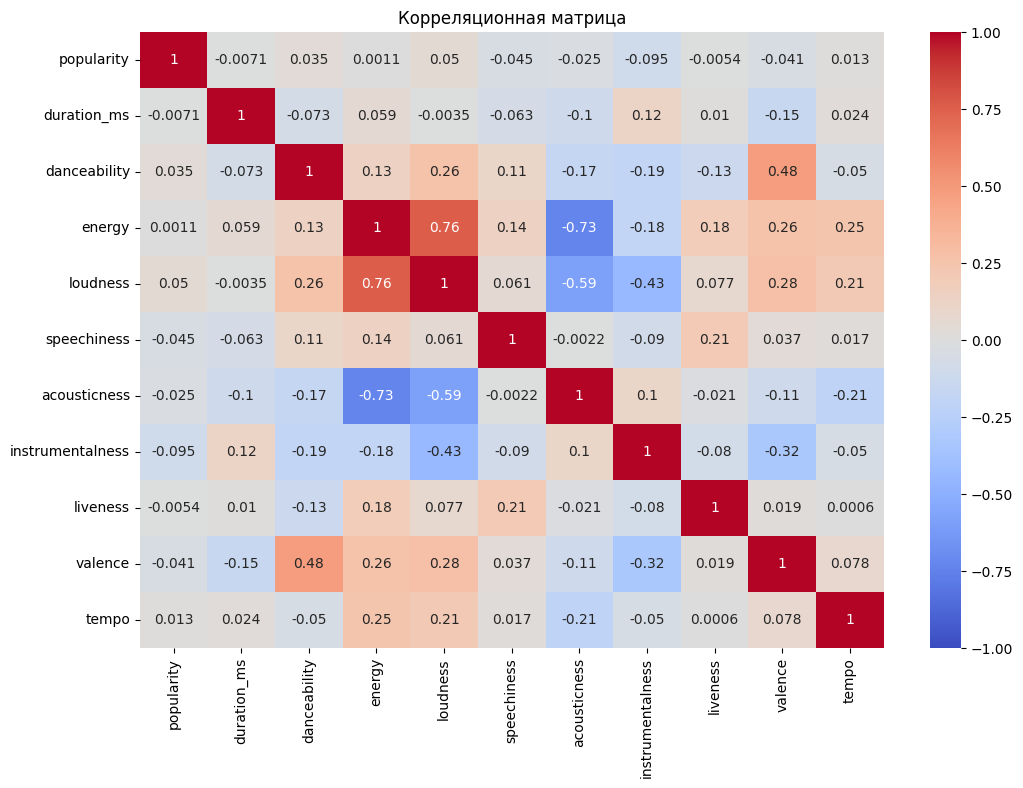

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

energy и loudness:

У этих признаков наблюдается высокая положительная корреляция (приближается к 1). Это говорит о том, что более энергичные треки обычно звучат громче. Такая зависимость объяснима, так как в большинстве музыкальных композиций энергия и громкость часто идут рука об руку.
Вывод: Можно предположить, что loudness и energy несут схожую информацию, и возможно, в некоторых случаях можно использовать только один из них для упрощения модели.

acousticness и energy:

У этих признаков отрицательная корреляция, что указывает на то, что акустические треки, как правило, менее энергичные. Это ожидаемо, поскольку акустические композиции обычно спокойнее.
Вывод: Эти признаки дополняют друг друга и могут быть полезны при кластеризации или сегментации треков по типам.

danceability и valence:

Наблюдается слабая положительная корреляция между этими признаками. Это может означать, что более "танцевальные" треки часто имеют более позитивную эмоциональную окраску, хотя эта связь не очень сильная.
Вывод: Для предсказания настроения треков танцевальность может быть дополнительным фактором, но на нее не стоит полагаться как на основной показатель.

instrumentalness и speechiness:

Между этими признаками также присутствует слабая отрицательная корреляция, что логично, так как треки с высоким уровнем инструментальности (без вокала) имеют низкий уровень речевых элементов, и наоборот.
Вывод: Эти признаки помогут различать вокальные и инструментальные треки, что может быть полезно для классификации треков по стилю.

loudness и popularity:

Наблюдается слабая положительная корреляция, что может означать, что более громкие треки имеют тенденцию быть немного популярнее. Это может быть связано с тем, что громкие треки могут восприниматься как более "энергичные" или "захватывающие".
Вывод: Хотя корреляция слабая, громкость может быть фактором, который косвенно влияет на популярность трека.

Некоторые признаки, такие как tempo и popularity, liveness и valence, не имеют выраженной корреляции. Это может означать, что они не зависят друг от друга и могут вносить уникальную информацию в модель.
Вывод: Такие признаки можно использовать в моделях машинного обучения, не опасаясь мультиколлинеарности, что может улучшить качество предсказаний.

In [ ]:
df['popularity'].value_counts()

,count
popularity,
0,16020
22,2354
21,2344
44,2288
1,2140
...,...
96,7
94,7
95,5


50 - 94

In [ ]:
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [7]:
df['duration_min'] = df['duration_ms'] / 60000
df['intensity'] = df['energy'] * (df['loudness'] + 60)
df['dance_valence'] = df['danceability'] * df['valence']
df['tempo_energy'] = df['tempo'] * df['energy']
df['acoustic_to_energy'] = df['acousticness'] / (df['energy'] + 1e-6)
df['dance_loudness'] = df['danceability'] * df['loudness']

df['popularity_category'] = pd.cut(df['popularity'], bins=[0, 30, 70, 100], labels=['Low', 'Medium', 'High'])

new_features = ['tempo_energy', 'acoustic_to_energy', 'dance_loudness', 'duration_min', 'intensity', 'dance_valence']
corr_with_target = df[new_features + ['popularity']].corr()['popularity'].drop('popularity')
print(corr_with_target)

tempo_energy          0.000257
acoustic_to_energy   -0.000166
dance_loudness        0.014441
duration_min         -0.007129
intensity             0.006297
dance_valence        -0.035748
Name: popularity, dtype: float64


In [8]:

X = df[['duration_min', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo', 'intensity', 'dance_valence', 'duration_min', 'intensity', 'dance_valence']]
y = df['popularity']
y_class = df['popularity_category']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [10]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:


model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.01),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 626.7821 - val_loss: 475.0664
Epoch 2/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 490.7383 - val_loss: 474.7780
Epoch 3/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 479.0291 - val_loss: 465.1892
Epoch 4/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 473.9774 - val_loss: 468.8208
Epoch 5/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 470.9255 - val_loss: 462.3019
Epoch 6/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 470.1923 - val_loss: 459.6815
Epoch 7/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 464.5568 - val_loss: 458.2900
Epoch 8/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 464.5663 - val_loss: 458.7210
Epoch 9/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 463.7478 - val_loss: 457.9977
Epoch 10/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 460.5572 - val_loss: 457.2610
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 456.3925
Test Loss: 453.018829345703

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Линейная регрессия
model_lr = LinearRegression()
scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Средний RMSE (Linear Regression): {(-scores_lr.mean()) ** 0.5}')


Средний RMSE (Linear Regression): 22.295927586898507


In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
scores_xgb = cross_val_score(model_xgb, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Средний RMSE (XGBoost): {(-scores_xgb.mean()) ** 0.5}')



Средний RMSE (XGBoost): 21.268799396575737


In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 17.456611469544864
RMSE: 21.28424364473898


MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

Модель с наименьшим RMSE - нейронная модель

In [ ]:
import keras_tuner as kt

# Определяем функцию для создания модели
def build_model(hp):
    model = keras.Sequential()

    # Первый слой
    model.add(layers.Dense(
        units=hp.Int('units_input', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)
    ))

    # Добавляем скрытые слои
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Последний слой
    model.add(layers.Dense(1))

    # Компиляция модели
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mean_squared_error'
    )
    return model

# Создаём тюнер для подбора гиперпараметров
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='song_popularity_optimization'
)

# Ранний стоп для предотвращения переобучения
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Запускаем поиск гиперпараметров
tuner.search(
    X_train_scaled, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[stop_early]
)

# Лучшие гиперпараметры
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Лучшие гиперпараметры:
 - Количество нейронов в первом слое: {best_hps.get('units_input')}
 - Количество слоёв: {best_hps.get('num_layers')}
 - Dropout: {[best_hps.get(f'dropout_{i}') for i in range(best_hps.get('num_layers'))]}
 - Скорость обучения: {best_hps.get('learning_rate')}
""")

# Обучение модели с лучшими гиперпараметрами
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Оценка модели
loss = best_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss after optimization: {loss}')


Trial 30 Complete [00h 04m 42s]
val_loss: 439.69744873046875

Best val_loss So Far: 421.63055419921875
Total elapsed time: 00h 44m 19s

Лучшие гиперпараметры:
 - Количество нейронов в первом слое: 256
 - Количество слоёв: 4
 - Dropout: [0.1, 0.5, 0.4, 0.30000000000000004]
 - Скорость обучения: 0.0003032990167232719

Epoch 1/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 687.9972 - val_loss: 473.2423
Epoch 2/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 497.5433 - val_loss: 478.8482
Epoch 3/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 481.0564 - val_loss: 469.4449
Epoch 4/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 476.9485 - val_loss: 460.2192
Epoch 5/10
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 474.9291 - val_loss: 460.9759
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 470.9622
Test Loss after optimization: 468.6018371582031


Результаты получились не очень

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = best_model.predict(X_test_scaled)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
MAE: 17.85561034294597
RMSE: 21.647207776750154


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.9725539788766828e+16

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

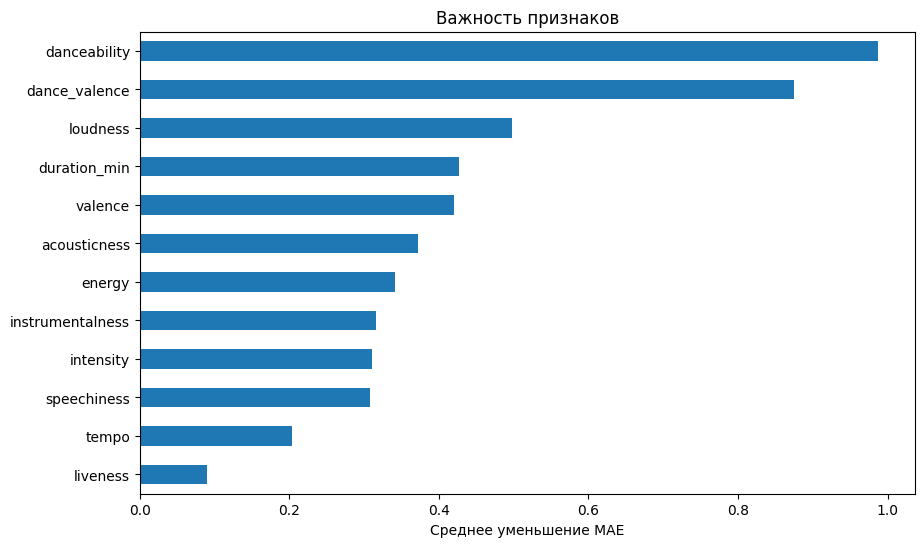

In [ ]:
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

In [21]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Определяем функцию создания модели (для использования с KerasRegressor)
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.01),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Оборачиваем модель
nn_model = KerasRegressor(model=build_model, epochs=10, batch_size=64, verbose=0)

# Создаем пользовательский метрик для RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))

# Выполняем кросс-валидацию
scores = cross_val_score(nn_model, X_train_scaled, y_train, cv=5, scoring=rmse_scorer)

# Вывод результатов
print("RMSE на каждой фолде:", scores)
print("Средний RMSE:", np.mean(scores))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: Fu

RMSE на каждой фолде: [21.28252577 21.44014035 21.23977437 21.56174455 21.39590714]
Средний RMSE: 21.384018434880726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Выводы на основе результатов:

Линейная регрессия:

Средний RMSE составляет 22.30.
Этот результат является наименее точным среди всех протестированных моделей. Это может указывать на то, что данные имеют нелинейные зависимости, которые линейная регрессия не способна эффективно улавливать.

XGBoost:

Средний RMSE составляет 21.27, что является лучшим результатом среди всех моделей.
XGBoost справляется лучше благодаря своей способности выявлять сложные зависимости и обрабатывать нелинейные данные.

Базовая нейронная сеть:

RMSE составляет 21.28, что практически идентично XGBoost.
Это демонстрирует, что нейронная сеть также хорошо справляется с задачей. Однако для её настройки потребовалось больше времени, чем для XGBoost.

Улучшенная нейронная сеть:

RMSE составляет 21.65, что хуже базовой нейронной сети и XGBoost.
Это может указывать на переобучение из-за слишком сложной архитектуры или неудачной настройки гиперпараметров.

KerasRegressor с кросс-валидацией:

Средний RMSE составляет 21.38.
Этот результат подтверждает, что нейронная сеть имеет стабильное качество предсказаний на различных фолдах. Однако, результат всё же хуже, чем у XGBoost.

Общие выводы:

XGBoost показал наилучший результат среди всех моделей (наименьший RMSE).
Нейронная сеть обладает сопоставимой точностью, но требует больше времени на настройку и обучение.
Линейная регрессия уступает, так как не может справляться с нелинейными зависимостями в данных.